<a href="https://colab.research.google.com/github/gomezguzmangalileaguadalupe-create/Multicapa/blob/main/XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos de entrada y salida del problema XOR

(El problema XOR es un clásico ejemplo donde la salida es 1 solo si una

In [1]:
import numpy as np

# Datos XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


Definición del modelo neuronal
"Sequential" indica que las capas se conectan una tras otra

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(4, activation='relu', input_dim=2),# Capa oculta con 4 neuronas y activación ReLU
    Dense(1, activation='sigmoid') # Capa de salida con 1 neurona (para clasificación binaria)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)


Compilamos el modelo indicando:
 Optimizador: Adam
Función de pérdida: binary_crossentropy (para clasificación binaria)
Métrica: accuracy (precisión)

In [4]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Entrenamos el modelo con los datos XOR
epochs = 50 → número de iteraciones de entrenamiento
verbose=0 → no muestra detalles durante el entrenamiento

In [5]:
history = modelo.fit(
    X, y,
    epochs=50,
    verbose=0,
)


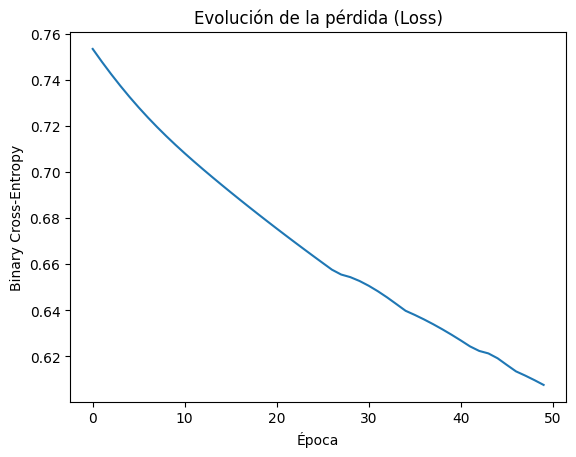

In [6]:
import matplotlib.pyplot as plt
# Graficamos la evolución de la pérdida (loss) durante el entrenamiento
plt.plot(history.history['loss'])
plt.title('Evolución de la pérdida (Loss)')
plt.xlabel('Época')
plt.ylabel('Binary Cross-Entropy')
plt.show()

Evaluamos el modelo con los mismos datos de entrenamiento

Realizamos predicciones con los mismos datos de entrada
Se usa 0.5 como umbral para decidir si la salida es 0 o 1

In [7]:
loss, accuracy = modelo.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.7500 - loss: 0.6055
Loss: 0.6054500937461853, Accuracy: 0.75


Mostramos las predicciones en consola

In [8]:
pred = (modelo.predict(X) > 0.5).astype(int)
for i, (inp, p) in enumerate(zip(X, pred)):
    print(f"{inp} -> {p[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
[0 0] -> 0
[0 1] -> 1
[1 0] -> 0
[1 1] -> 0
